### Cumulative Distribution Functions
#### The limits of Probability Mass Functions
Probability Mass Functions are great when the number of unique values is small. But its limitations became apparent due to these reasons:
- As the number of unique values increases, the probability associated with each value gets smaller and the effect of random noise increases
- Harder to tell which features are meaningful
- Hard to see overall patterns
- Binning may help, but may also smooth out useful information

This graph shows the limitations of probability mass functions:

In [38]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from cycler import cycler

matplotlib.style.use("dark_background")
%matplotlib inline
rcParams["figure.figsize"] = (12, 6)
rcParams["axes.prop_cycle"] = cycler(color=["#4299E1", "#F56565", "#48BB78"])
rcParams["axes.facecolor"] = "#1A202C"
rcParams["axes.edgecolor"] = "#A0AEC0"
rcParams["axes.grid"] = True
rcParams["grid.color"] = "#A0AEC0"
rcParams["grid.alpha"] = 0.7
rcParams["axes.titlecolor"] = "#A0AEC0"
rcParams["axes.labelcolor"] = "#A0AEC0"
rcParams["xtick.color"] = "#A0AEC0"
rcParams["ytick.color"] = "#A0AEC0"

Text(0, 0.5, 'Probability')

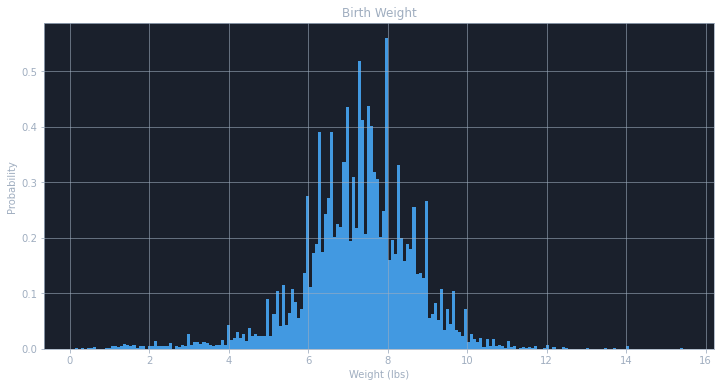

In [2]:
import pandas as pd
import numpy as np

df = pd.read_pickle("nsfg_data.pkl")
df["totalwgt_lb"].plot.hist(bins=200, density=True)
plt.title("Birth Weight")
plt.xlabel("Weight (lbs)")
plt.ylabel("Probability")

#### Percentiles
Given a set of values that are used to rank against, percentile ranking calculation can be coded as such:

In [19]:
# Say that these are exam scores to rank against
values = [55, 66, 77, 88, 99]
values.sort()
def PercentileRank(sample, valueToRank):
    count = 0
    for value in sample:
        if value <= valueToRank:
            count += 1
    
    percentileRank = 100. * count / len(values)
    return percentileRank

print(PercentileRank(values, 75))
print(PercentileRank(values, 88))
print(PercentileRank(values, 100))

40.0
80.0
100.0


The value used to rank against can also be retrieved from a given percentile ranking, like so:

In [20]:
def Percentile(sample, percentileRank):
    # // is a division that returns an integer, / is a division that returns a floating point
    index = percentileRank * (len(sample) - 1) // 100 
    return sample[index]

print(Percentile(values, 40))
print(Percentile(values, 80))
print(Percentile(values, 100))

66
88
99


#### Cumulative Distribution Functions
The cumulative distribution function maps a value *x* to its percentile rank. Essentially, it is similar to how the `PercentileRank` is calculated above, but the result is a probability in the range 0 to 1 instead of 0 to 100. Here is how it looks like in code, given a sample:

In [5]:
def EvaluateCDF(sample, x):
    count = 0
    for value in sample:
        if value <= x:
            count += 1
            
    # This is the only line that changed, no need to multiply by 100
    probability = count / len(sample)
    return probability

print(EvaluateCDF(values, 75))
print(EvaluateCDF(values, 88))
print(EvaluateCDF(values, 100))

0.4
0.8
1.0


And here is how it looks like when graphed, given a random dataset of two dice thrown:

Text(0, 0.5, 'CDF')

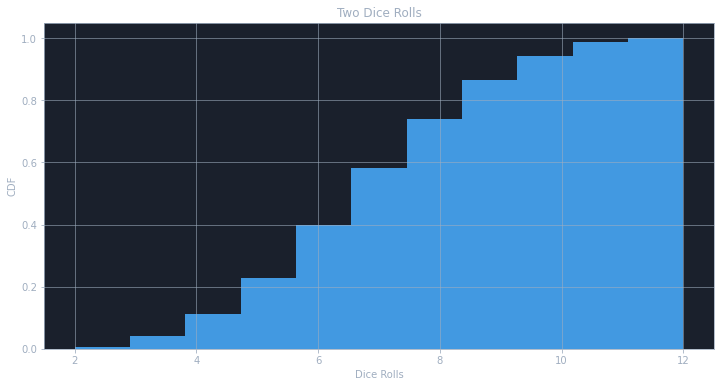

In [6]:
from random import random

# Simulating 1000 rolls of 2 dice
dieRolls1 = [round(random() * 5 + 1) for i in range(0, 1000)]
dieRolls2 = [round(random() * 5 + 1) for i in range(0, 1000)]

# Adding the values of the rolled dice values
dieRollSum = np.array([dieRolls1[i] + dieRolls2[i] for i in range(0, 1000)])
series = pd.Series(dieRollSum)

series.plot.hist(cumulative=True, density=True, bins=11)
plt.title("Two Dice Rolls")
plt.xlabel("Dice Rolls")
plt.ylabel("CDF")

Here is the same variable `totalwgt_lb` graphed above, but now graphed using cumulative distribution function:

Text(0, 0.5, 'CDF')

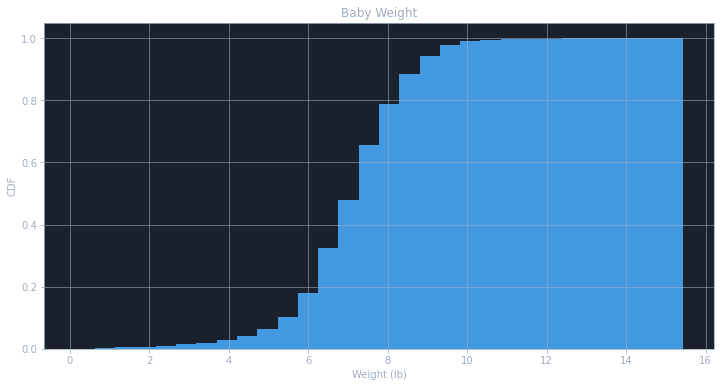

In [7]:
df["totalwgt_lb"].plot.hist(bins=30, density=True, cumulative=True)
plt.title("Baby Weight")
plt.xlabel("Weight (lb)")
plt.ylabel("CDF")

Here is the variable `prglngth` for live births graphed using CDF:

Text(0, 0.5, 'CDF')

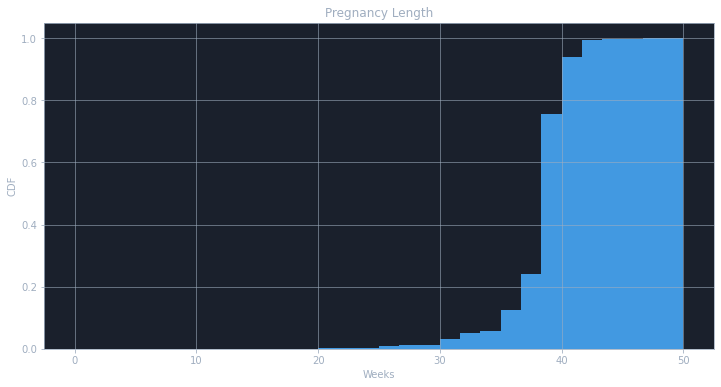

In [8]:
live = df[df["outcome"] == 1]

live["prglngth"].plot.hist(bins=30, density=True, cumulative=True)
plt.title("Pregnancy Length")
plt.xlabel("Weeks")
plt.ylabel("CDF")

According to this graph, about 10% of live pregnancies are shorter than 36 weeks, and about 90% of live pregnancies are shorter than 41 weeks. Common values also appear as steep or vertical sections of the graph, like in 39 weeks, which is the mode of the graph. Few values could be found below 30 weeks, so the graph is flatter there.

#### Comparing CDFs
CDFs are especially useful for comparing distributions. Previously, we have compared the PMF graphs of both the firstborns and others by getting the difference of the two series. We came to the conclusion that firstborns are unlikely to be born at week 39, while they are more likely to be born at weeks 41 and 42.

Let's see how their CDFs would compare:

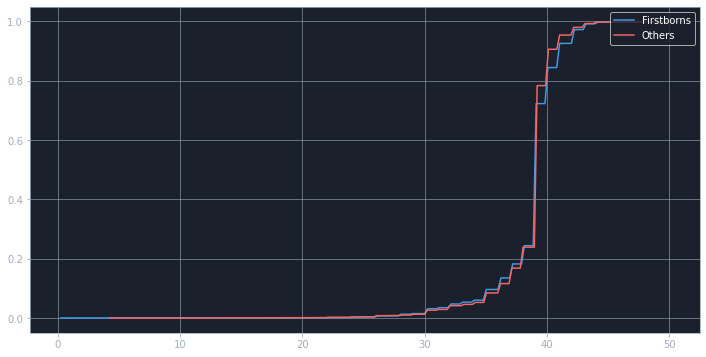

In [9]:
firsts = live[live["birthord"] == 1]
others = live[live["birthord"] != 1]

#plt.hist((firsts["prglngth"], others["prglngth"]), bins=30, density=True, cumulative=True, label=("Firstborns", "Others"))
hist, bins = np.histogram(firsts["prglngth"], bins=200, density=True)
offset = bins[1:] - bins[:-1]

# Divide by the biggest (aka last) value
plt.plot(bins[:-1] + offset, np.cumsum(hist) / np.cumsum(hist)[-1], label="Firstborns")

hist2, bins2 = np.histogram(others["prglngth"], bins=200, density=True)
plt.plot(bins2[:-1] + offset, np.cumsum(hist2) / np.cumsum(hist2)[-1], label="Others")

plt.legend(loc=1)

((array([-3.60337314, -3.36607608, -3.23518821, ...,  3.23518821,
          3.36607608,  3.60337314]),
  array([ 0, 17, 20, ..., 48, 48, 48], dtype=int64)),
 (2.4255874739638337, 38.60095173351461, 0.8682443016024038))

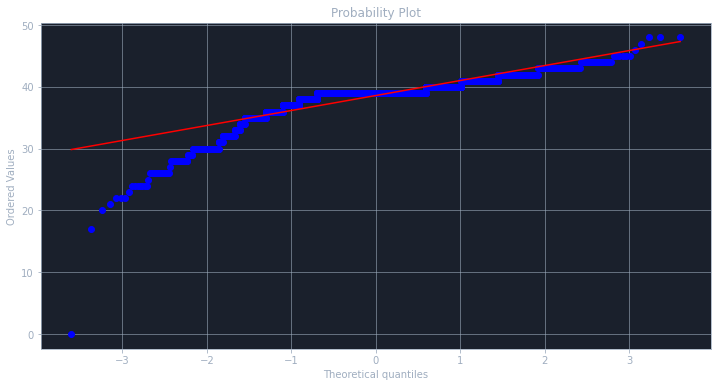

In [10]:
# QQ Plot is basically sorting data in ascending order
# In this case, the data is not uniformly distributed

from scipy import stats
stats.probplot(firsts["prglngth"].dropna(), plot=plt)

((array([-3.62162828, -3.38545234, -3.25524035, ...,  3.25524035,
          3.38545234,  3.62162828]),
  array([ 4,  9, 13, ..., 48, 50, 50], dtype=int64)),
 (2.159211165647865, 38.52291446673706, 0.8249420164201241))

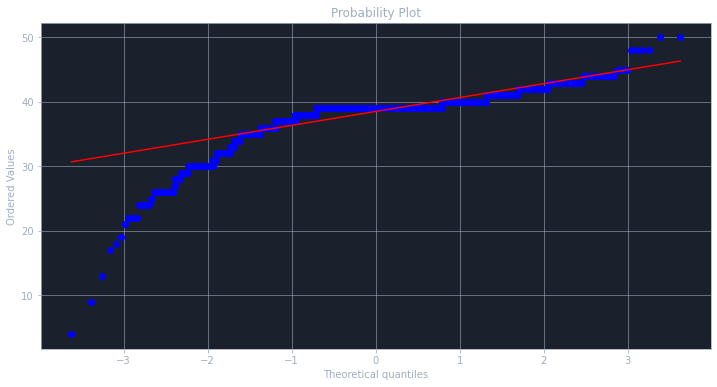

In [11]:
stats.probplot(others["prglngth"].dropna(), plot=plt)

((array([-3.78553345, -3.5589772 , -3.43453071, ...,  3.43453071,
          3.5589772 ,  3.78553345]),
  array([ 0.125 ,  0.3125,  0.4375, ..., 14.    , 14.    , 15.4375])),
 (1.3841720286629828, 7.265628457623368, 0.9825410266606884))

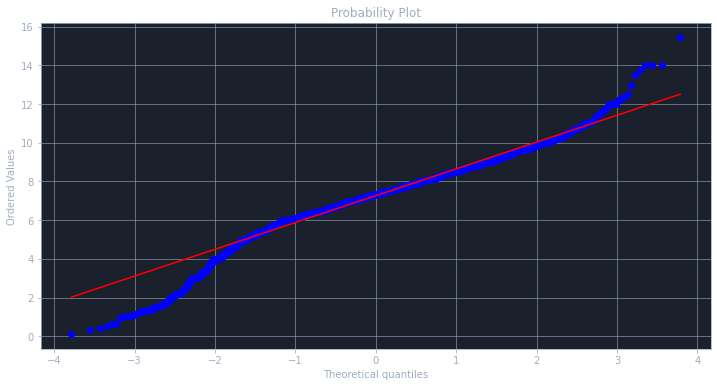

In [12]:
stats.probplot(live["totalwgt_lb"].dropna(), plot=plt)

#### Random Numbers
We can also choose a random sample from our data set and see how the CDF of its percentile ranks will look like.

For example, if we choose a random sample of size 100 from the pregnancy lengths of firstborn live births and graph its percentile ranks using CDF:

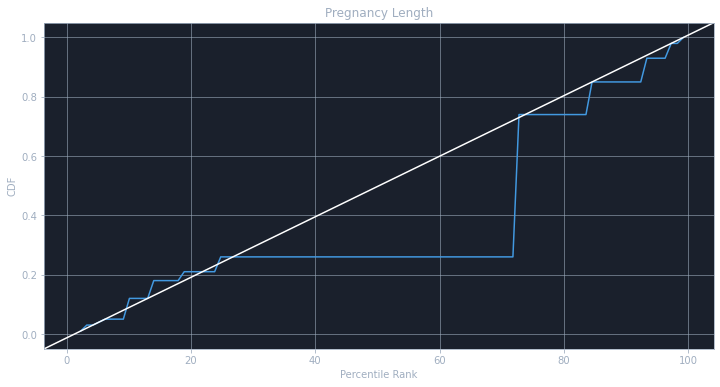

In [43]:
pregLengths = firsts["prglngth"].dropna()

sample = np.random.choice(pregLengths, 100, replace=True)
ranks = pd.Series([EvaluateCDF(pregLengths, x) * 100 for x in sample])

hist, bins = np.histogram(ranks, bins=100, density=True)
offset = bins[1:] - bins[:-1]
plt.plot(bins[:-1] + offset, np.cumsum(hist) / np.cumsum(hist)[-1])
plt.title("Pregnancy Length")
plt.xlabel("Percentile Rank")
plt.ylabel("CDF")

# The straight line to show how uniform the distribution of the graph is
plt.axline((ranks.min(), 0), (ranks.max(), 1))

If this graph was closer to the shape of the white line, then the data is uniformly distributed. In this case, the data is not uniformly distributed.

In comparison, if we graph the CDF of the percentile ranks of a random sample of the live birth weights, we will get this:

<class 'pandas.core.series.Series'>


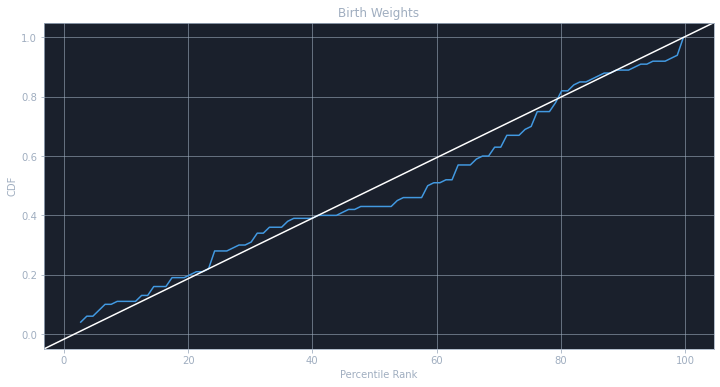

In [35]:
weights = live["totalwgt_lb"].dropna()

sample = np.random.choice(weights, 100, replace=True)
ranks = pd.Series([EvaluateCDF(weights, x) * 100 for x in sample])

hist, bins = np.histogram(ranks, bins=100, density=True)
offset = bins[1:] - bins[:-1]
plt.plot(bins[:-1] + offset, np.cumsum(hist) / np.cumsum(hist)[-1])
plt.title("Birth Weights")
plt.xlabel("Percentile Rank")
plt.ylabel("CDF")

plt.axline((ranks.min(), 0), (ranks.max(), 1))

As we can see on the above graph, the CDF is much closer to the straight line, meaning the distribution is uniform. If the distribution is uniform, then we can use a uniform random sample of this data for Monte Carlo simulations!

#### Exercises
Here, I'm trying to figure out what my and my sis' birth weight's percentile ranking is compared to others. My sis is the firstborn, I'm the second. However, we were born in Philippines, therefore we probably do not fit in this data well.

In [17]:
# Sis is 5 lbs
weights = firsts["totalwgt_lb"]
print(str(round(EvaluateCDF(weights, 5) * 100, 2)) + " %")

5.44 %


In [18]:
# I was born 6 lbs
weights = others["totalwgt_lb"]
print(str(round(EvaluateCDF(weights, 6) * 100, 2)) + " %")

13.69 %
